***

# Homework 2 (Honors)

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import linalg as ln
from scipy.stats import norm
import matplotlib.gridspec as gridspec

# Question 1.

**Data downloaded for the RMM index (an index for the MJO) from [here](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/index.html).**

In [8]:
column_names = ['year', 'month', 'day', 'RMM1', 'RMM2', 'phase', 'amplitude', 'method']

df = pd.read_csv("https://raw.githubusercontent.com/Stochastic1017/MATH_616/refs/heads/main/dataset/RMM_data.csv",
                 names=column_names, comment='R')
df.replace([1.E36, 999], np.nan, inplace=True)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop(columns=['year', 'month', 'day'], inplace=True)
df

ValueError: Unable to parse string "        1974           6           1   1.6344700       1.2030400               5   2.0294800      WH04_method:_OL" at position 0

# Question 2.

**Make plots similar to Figure 1 and Figure 12 from the Data-Driven SDE Paper (regardless of which paper you use in later tasks) (and ignore SSA curves in Figure 1 and ensemble predictions in Figure 12)**

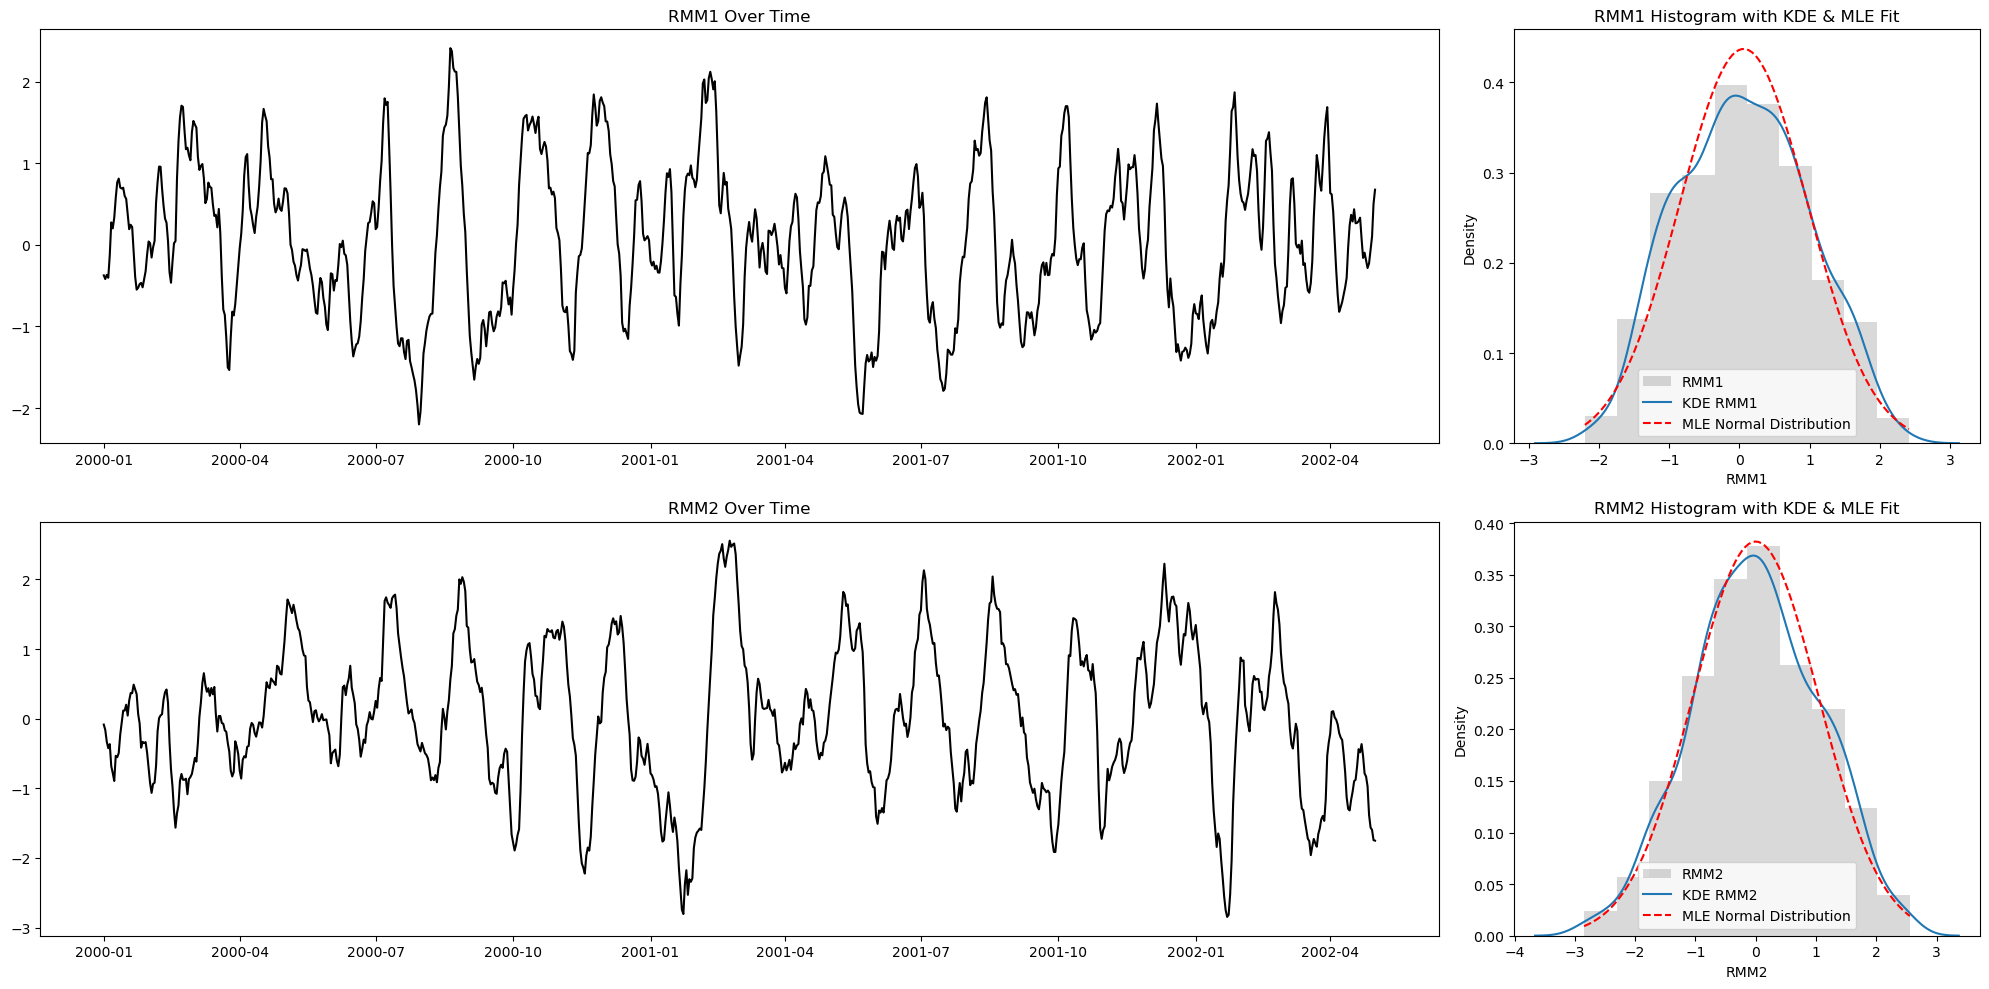

In [5]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

df_2000 = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2002-05-01')]

ax1.plot(df_2000['date'], df_2000['RMM1'], color='black', label=f'RMM1')
ax1.set_title('RMM1 Over Time')

ax2.hist(df_2000['RMM1'], density=True, alpha=0.15, color='black', label=f'RMM1')
sns.kdeplot(data=df_2000, x="RMM1", ax=ax2, fill=False, label='KDE RMM1')

rmm1_mean, rmm1_std = np.mean(df_2000['RMM1']), np.std(df_2000['RMM1'])
x_rmm1 = np.linspace(min(df_2000['RMM1']), max(df_2000['RMM1']), 100)
pdf_rmm1 = norm.pdf(x_rmm1, rmm1_mean, rmm1_std)
ax2.plot(x_rmm1, pdf_rmm1, 'r--', label=f'MLE Normal Distribution')
ax2.set_title('RMM1 Histogram with KDE & MLE Fit')
ax2.legend()

ax3.plot(df_2000['date'], df_2000['RMM2'], color='black', label=f'RMM2')
ax3.set_title('RMM2 Over Time')

ax4.hist(df_2000['RMM2'], density=True, alpha=0.15, color='black', label=f'RMM2')
sns.kdeplot(data=df_2000, x="RMM2", ax=ax4, fill=False, label=f'KDE RMM2')

rmm2_mean, rmm2_std = np.mean(df_2000['RMM2']), np.std(df_2000['RMM2'])
x_rmm2 = np.linspace(min(df_2000['RMM2']), max(df_2000['RMM2']), 100)
pdf_rmm2 = norm.pdf(x_rmm2, rmm2_mean, rmm2_std)
ax4.plot(x_rmm2, pdf_rmm2, 'r--', label=f'MLE Normal Distribution')
ax4.set_title('RMM2 Histogram with KDE & MLE Fit')
ax4.legend()

plt.tight_layout()

plt.show()

# Question 3.

**Depending on which paper you select:**

## 3 (a.)

**If you follow the Data-Driven SDE paper, then write a code that uses the Euler-Maruyama method to find numerical solutions to Equations (2a)-(2d). Use the parameter values from the Figure 2 caption. Use your simulated data to make plots as in Problem 2.**

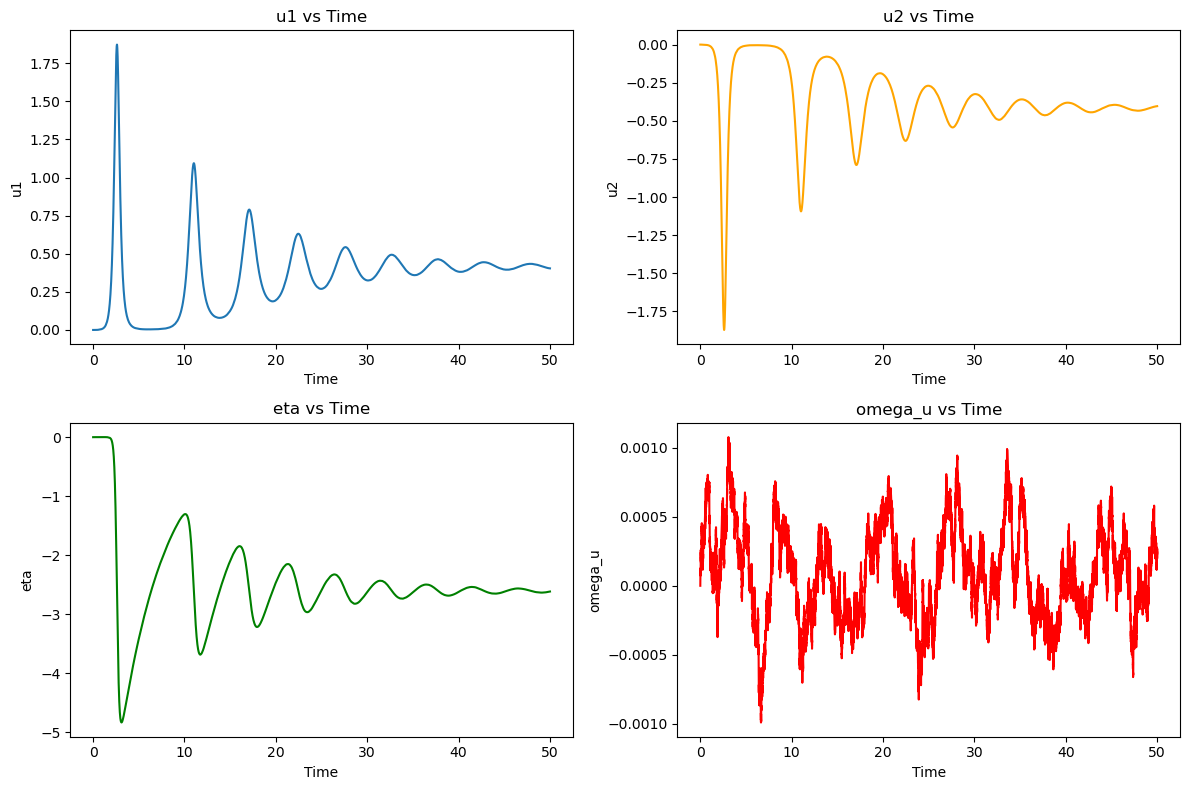

In [6]:
def du1_dt(d_u, gamma, eta, a, omega_u, sigma_u, W_u1, u1, u2):
    return (-d_u*u1 + gamma*eta*u1 - (a + omega_u)*u2) + sigma_u*W_u1

def du2_dt(d_u, gamma, eta, a, omega_u, sigma_u, W_u2, u1, u2):
    return (-d_u*u2 + gamma*eta*u2 - (a + omega_u)*u1) + sigma_u*W_u2

def deta_dt(d_eta, gamma, eta, sigma_eta, W_eta, u1, u2):
    return (-d_eta*eta - gamma*(u1**2 + u2**2)) + sigma_eta*W_eta

def domega_u_dt(d_omega, sigma_omega, W_omega, omega_u):
    return (-d_omega * omega_u) + (sigma_omega*W_omega)

# Parameters
a=4
gamma=1.5
sigma_u=0.4
sigma_eta=1
sigma_omega=0.5
d_u=0.1
d_eta=0.2
d_omega=1.2

# Time parameters
T = 50  # total time
dt = 0.001  # time step
num_steps = int(T / dt)

# Initialize variables
u1 = np.zeros(num_steps)
u2 = np.zeros(num_steps)
eta_values = np.zeros(num_steps)
omega_u_values = np.zeros(num_steps)

# Initial conditions
u1[0], u2[0], eta_values[0], omega_u_values[0] = 0.0, 0.0, 0.0, 0.0

# Simulation loop using Euler-Maruyama method
for i in range(1, num_steps):
    # Generate white noise increments
    W_u1 = np.random.normal(0, np.sqrt(dt))
    W_u2 = np.random.normal(0, np.sqrt(dt))
    W_eta = np.random.normal(0, np.sqrt(dt))
    W_omega = np.random.normal(0, np.sqrt(dt))

    # Update variables using Euler-Maruyama method
    u1[i] = u1[i-1] + du1_dt(d_u, gamma, eta_values[i-1], a, omega_u_values[i-1], sigma_u, W_u1, u1[i-1], u2[i-1]) * dt
    u2[i] = u2[i-1] + du2_dt(d_u, gamma, eta_values[i-1], a, omega_u_values[i-1], sigma_u, W_u2, u1[i-1], u2[i-1]) * dt
    eta_values[i] = eta_values[i-1] + deta_dt(d_eta, gamma, eta_values[i-1], sigma_eta, W_eta, u1[i-1], u2[i-1]) * dt
    omega_u_values[i] = omega_u_values[i-1] + domega_u_dt(d_omega, sigma_omega, W_omega, omega_u_values[i-1]) * dt

# Plot the results
time = np.linspace(0, T, num_steps)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, u1, label="u1")
plt.xlabel("Time")
plt.ylabel("u1")
plt.title("u1 vs Time")

plt.subplot(2, 2, 2)
plt.plot(time, u2, label="u2", color='orange')
plt.xlabel("Time")
plt.ylabel("u2")
plt.title("u2 vs Time")

plt.subplot(2, 2, 3)
plt.plot(time, eta_values, label="eta", color='green')
plt.xlabel("Time")
plt.ylabel("eta")
plt.title("eta vs Time")

plt.subplot(2, 2, 4)
plt.plot(time, omega_u_values, label="omega_u", color='red')
plt.xlabel("Time")
plt.ylabel("omega_u")
plt.title("omega_u vs Time")

plt.tight_layout()
plt.show()


## 3 (b.)

**If you follow the SSA-CP paper, then write a code to calculate the traditional SSA, following equations (1)-(5). Apply your code to the RMM index data. Make plots as in Problem 2, and make a separate plot for each of the first 4 SSA modes.**

In [13]:
class Traditional_SSA():

    def __init__(self, arr, embedding_window, mode):
            
        if not isinstance(arr, np.ndarray):
            self.arr = np.array(arr)
        else:
            self.arr = arr

        self.M = embedding_window
        if self.M > len(self.arr):
            raise ValueError(f"Embedding window {embedding_window} cannot be larger than the length of the time series {len(self.arr)}.")
        
        self.N, self.X = self.time_lagged_embedding()
        self.eigenvalues, self.eigenvectors = self.get_eigenvalue_eigenvector()
        
        idx = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]

        if (not isinstance(mode, (int))):
            raise TypeError(f"mode {mode} should be of type python int.")
        elif mode >= len(self.eigenvalues):
            raise ValueError(f"mode {mode} is out of bounds for the number of eigenvectors ({len(self.eigenvalues)}).")
        elif mode < 0:
            raise ValueError(f"mode {mode} should be non-negative.")
        else:
            self.mode = mode

    def time_lagged_embedding(self):

        """
        Create a time-lagged embedding matrix from a time series vector.
        """

        N = len(self.arr)
        embedding_matrix = np.zeros((self.M, N - self.M + 1))
        
        for i in range(self.M):
            embedding_matrix[i] = self.arr[i:N - self.M + 1 + i]

        return N, embedding_matrix

    def covariance_matrix(self):
        
        """
        Compute the covariance matrix of the embedding matrix.
        """
        
        return np.matmul(self.X, self.X.T) / (self.N - self.M + 1)

    def get_eigenvalue_eigenvector(self):
        
        """
        Compute eigenvalues and eigenvectors of the covariance matrix.
        """
        
        return np.linalg.eigh(self.covariance_matrix())

    def get_PC(self):
        
        """
        Compute the principal components (PCs).
        """
        
        return np.matmul(self.X.T, self.eigenvectors)

    def reconstruct_component(self):
        
        """
        Reconstruct (RC) the data for a given mode based on eigenvector and eigenvalue decomposition.
        """
        
        z_t = np.zeros(self.N)
        v_i = self.eigenvectors[:, self.mode]
        for t in range(1, self.N + 1):
            
            if 1 <= t <= self.M - 1:
                M_t, L_t, U_t = t, 1, t
            
            elif self.M <= t <= self.N - self.M + 1:
                M_t, L_t, U_t = self.M, 1, self.M
            
            else:
                M_t, L_t, U_t = self.N - t + 1, t - self.N + self.M, self.M

            if t - L_t >= self.X.shape[1]:
                continue 
            
            z_t[t-1] = np.sum(v_i[L_t-1:U_t] * self.X[L_t-1:U_t, t-L_t]) / M_t
        
        return z_t
    
ssa_1 = Traditional_SSA(arr=np.asanyarray(df_2000['RMM1']), embedding_window=8, mode=0)
ssa_2 = Traditional_SSA(arr=np.asanyarray(df_2000['RMM2']), embedding_window=2, mode=0)

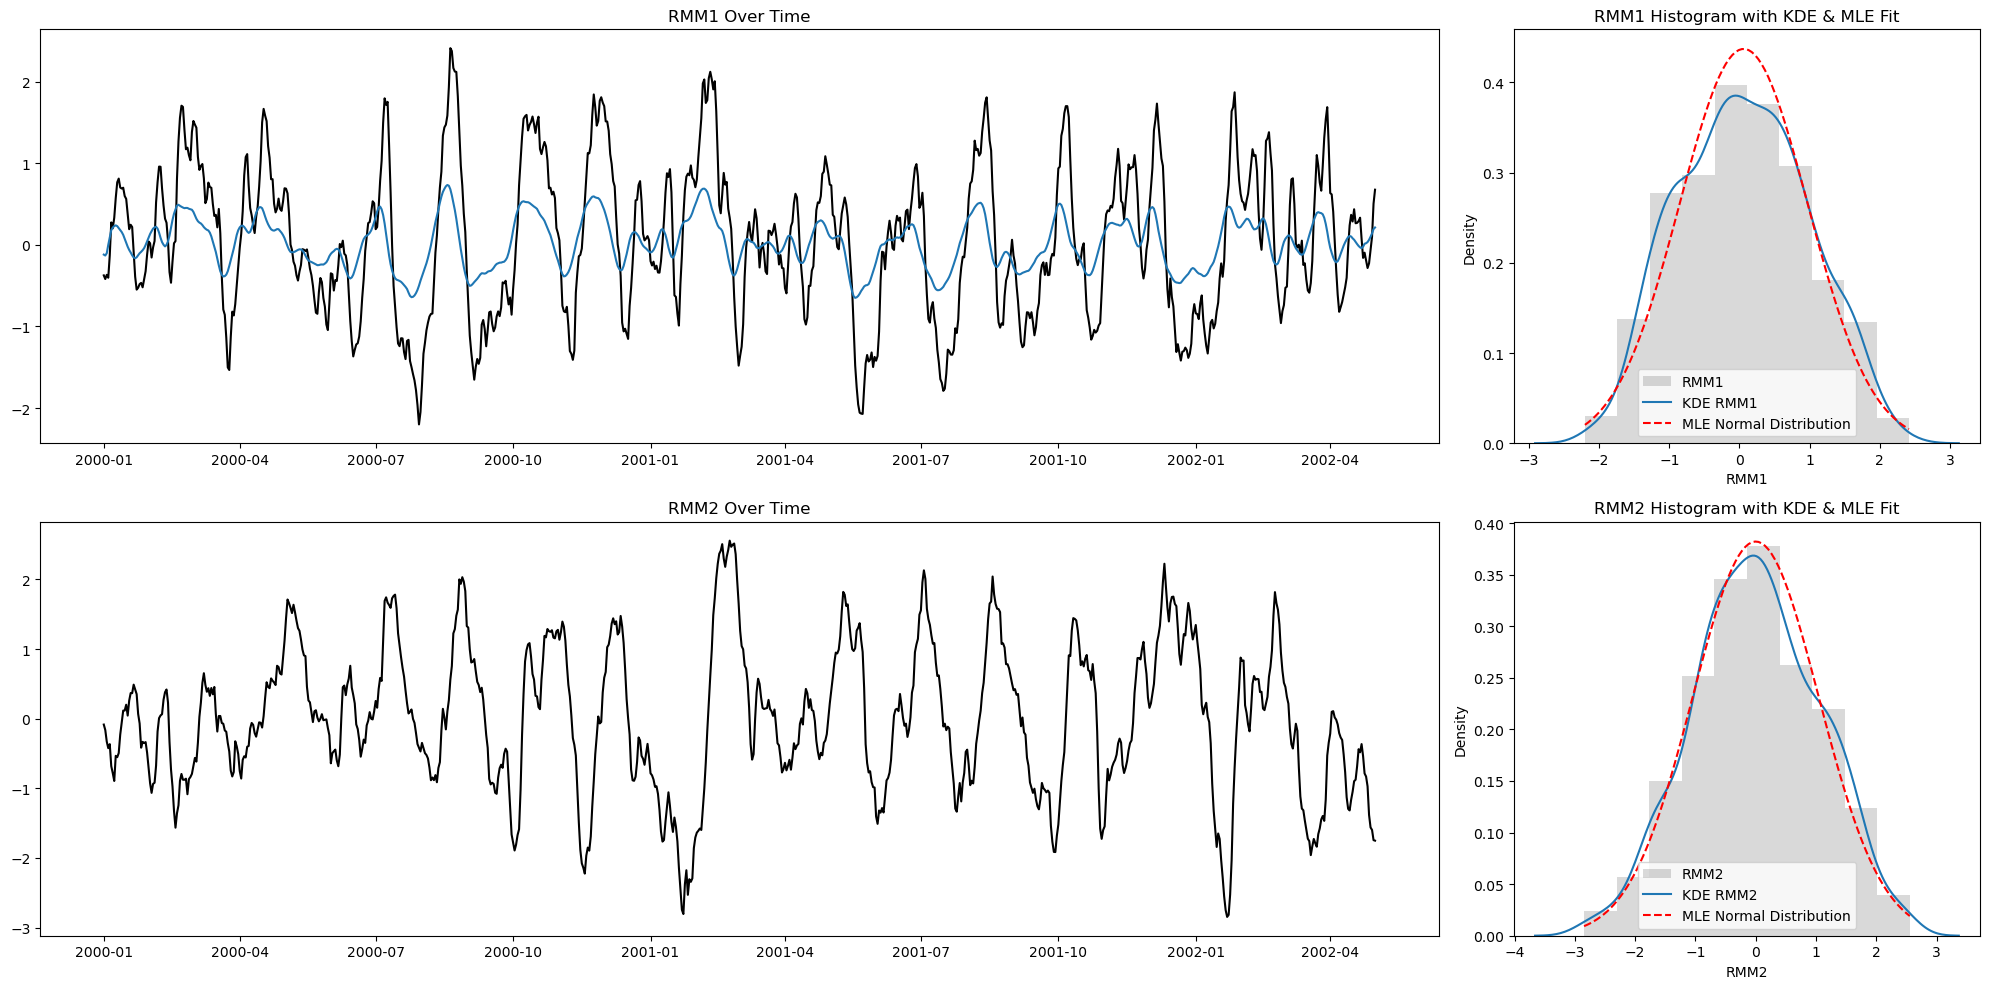

In [15]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

df_2000 = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2002-05-01')]

ax1.plot(df_2000['date'], df_2000['RMM1'], color='black', label=f'RMM1')
ax1.plot(df_2000['date'], -ssa_1.reconstruct_component(), label=f'RMM1')
ax1.set_title('RMM1 Over Time')

ax2.hist(df_2000['RMM1'], density=True, alpha=0.15, color='black', label=f'RMM1')
sns.kdeplot(data=df_2000, x="RMM1", ax=ax2, fill=False, label='KDE RMM1')

rmm1_mean, rmm1_std = np.mean(df_2000['RMM1']), np.std(df_2000['RMM1'])
x_rmm1 = np.linspace(min(df_2000['RMM1']), max(df_2000['RMM1']), 100)
pdf_rmm1 = norm.pdf(x_rmm1, rmm1_mean, rmm1_std)
ax2.plot(x_rmm1, pdf_rmm1, 'r--', label=f'MLE Normal Distribution')
ax2.set_title('RMM1 Histogram with KDE & MLE Fit')
ax2.legend()

ax3.plot(df_2000['date'], df_2000['RMM2'], color='black', label=f'RMM2')
ax3.set_title('RMM2 Over Time')

ax4.hist(df_2000['RMM2'], density=True, alpha=0.15, color='black', label=f'RMM2')
sns.kdeplot(data=df_2000, x="RMM2", ax=ax4, fill=False, label=f'KDE RMM2')

rmm2_mean, rmm2_std = np.mean(df_2000['RMM2']), np.std(df_2000['RMM2'])
x_rmm2 = np.linspace(min(df_2000['RMM2']), max(df_2000['RMM2']), 100)
pdf_rmm2 = norm.pdf(x_rmm2, rmm2_mean, rmm2_std)
ax4.plot(x_rmm2, pdf_rmm2, 'r--', label=f'MLE Normal Distribution')
ax4.set_title('RMM2 Histogram with KDE & MLE Fit')
ax4.legend()

plt.tight_layout()

plt.show()